<a href="https://colab.research.google.com/github/Elizabeth0328/DIDA-325-Projects/blob/main/Final_Project_Official.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### An Audit On NYC Stop and Frisk Data

In [ ]:
#Asher Coughlan, Felipe mercado, Thomas Wuensch, Elizabeth Santana Lugo

##Introduction
The local New York City government has hired us, a small nonprofit organization, to review local police data. We must ensure that their stop and searches have been efficient and non-discriminatory as the residents have raised concerns over whether the techniques used by the police are ethical.
We also must ensure that Men and Women are treated in similar matters during stops, as to not have one gender be over questioned during a frisk stop.

The origin of this dataset comes from the  New York Civil Liberties Union or (NYCLU). The organization takes publicly available data on stop and frisk incidents that are annually uploaded on the NYPD website. Officers are supposed to fill out a form each time they make the stop.

### The Four Research Questions We Hope to Answer Using This Dataset

1. To what extent does the race of the person being stopped lend itself to an arrest?
2. Does whether a cop is in uniform or not have an effect on the rate of people stopped who actually have something illegal on them?
3. How does what gender you are have an effect on the duration of time you are observed for before being searched, and how does it have an effect on long you were stopped for?
4. Does what burrow a stop occurs in have an effect on the observed minuetes before a suspect is stopped?



### The Dataset

Taking a look at the [Stop-and-Frisk](https://www.nyclu.org/uploads/2024/04/2023_nypd_stop_and_frisk_data.xlsx) data provided to us by this [website](https://www.nyclu.org/data/stop-and-frisk-data), this dataset came from the NYPD and the stops and frisks they have made thoughout 2023 in NYC. It's made clear in the website that a majority of the stops made in this dataset are people of color, specifically black people, which is important when referring to some of our questions like question one that deals with race. Besides that this dataset includes data on how long people were observed for before they were stopped, and how long stops lasted. These are both very useful for our other questions about the effect of these two points on gender of the person stopped.

In [ ]:

#In order to get started, we first have to import all of the libraries that we will potentially use to answer our four questions.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

from sklearn.tree import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#We use pd.read to upload our dataset into this google colab

stf = pd.read_excel("https://www.nyclu.org/uploads/2024/04/2023_nypd_stop_and_frisk_data.xlsx")

#head() is used to display our dataset in our google colab
stf.head(20)


,STOP_ID,STOP_FRISK_DATE,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,...,SUSPECT_OTHER_DESCRIPTION,STOP_LOCATION_PRECINCT,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
0,1,2023-01-01,00:44:00,2023,January,Sunday,Based on Radio Run,APP,POM,804,...,BLUE HOODIE BLUE JEANS,5,A,3B,46 MADISON ST,MADISON ST,984781,198509,PBMS,MANHATTAN
1,2,2023-01-01,00:49:00,2023,January,Sunday,Based on Self Initiated,APP,POM,69,...,UNK,69,B,(null),9910 SEAVIEW AVE,SEAVIEW AVE,1015557,170379,PBBS,BROOKLYN
2,3,2023-01-01,05:31:00,2023,January,Sunday,Based on Radio Run,APP,POM,83,...,NaN,83,D,(null),TROUTMAN ST && ST NICHOLAS AVE,TROUTMAN ST,1005940,197103,PBBN,BROOKLYN
3,4,2023-01-01,04:59:00,2023,January,Sunday,Based on Self Initiated,APP,POM,113,...,(null),113,B,(null),FARMERS BLVD && 135 AVE,FARMERS BLVD,1049830,185439,PBQS,QUEENS
4,5,2023-01-01,05:21:00,2023,January,Sunday,Based on Self Initiated,APP,POF,46,...,(null),46,B,(null),2463 WEBSTER AVE,WEBSTER AVE,1013821,252710,PBBX,BRONX
5,6,2023-01-01,18:00:00,2023,January,Sunday,Based on Radio Run,APP,POF,181,...,NaN,6,C,(null),329 AVENUE OF THE AMERICAS,AVENUE OF THE AMERICAS,983845,205719,PBMS,MANHATTAN
6,7,2023-01-01,00:00:00,2023,January,Sunday,Based on Self Initiated,APP,POM,182,...,NaN,23,B,(null),E 110 ST && LEXINGTON AVE,E 110 ST,999643,228852,PBMN,MANHATTAN
7,8,2023-01-02,00:00:00,2023,January,Monday,Based on Radio Run,APP,POM,25,...,(null),25,B,(null),1862 LEXINGTON AVE,LEXINGTON AVE,1000287,230097,PBMN,MANHATTAN
8,9,2023-01-02,04:05:00,2023,January,Monday,Based on Radio Run,APP,POM,68,...,(null),68,C,(null),25 79 ST,79 ST,973794,169193,PBBS,BROOKLYN
9,10,2023-01-01,19:04:00,2023,January,Sunday,Based on Radio Run,APP,POM,20,...,(null),20,A,(null),BROADWAY && W 66 ST,BROADWAY,989173,221221,PBMN,MANHATTAN


In [ ]:
stf.shape

(16971, 82)

### Breaking down the Dataset

When looking at the rows specifically in this dataset, each row represents a different person that was stopped. In this particular dataset, there are around 16,971 rows, meaning around 16,971 different people were stopped in 2023 by the NYPD in NYC.



In [ ]:
#Here we ran this code to look at all the columns in this dataset
stf.columns

Index(['STOP_ID', 'STOP_FRISK_DATE', 'STOP_FRISK_TIME', 'YEAR2', 'MONTH2',
       'DAY2', 'STOP_WAS_INITIATED', 'RECORD_STATUS_CODE',
       'ISSUING_OFFICER_RANK', 'ISSUING_OFFICER_COMMAND_CODE',
       'SUPERVISING_OFFICER_RANK', 'SUPERVISING_OFFICER_COMMAND_CODE',
       'SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED',
       'LOCATION_IN_OUT_CODE', 'JURISDICTION_CODE', 'JURISDICTION_DESCRIPTION',
       'OBSERVED_DURATION_MINUTES', 'SUSPECTED_CRIME_DESCRIPTION',
       'STOP_DURATION_MINUTES', 'OFFICER_EXPLAINED_STOP_FLAG',
       'OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION', 'OTHER_PERSON_STOPPED_FLAG',
       'SUSPECT_ARRESTED_FLAG', 'SUSPECT_ARREST_OFFENSE',
       'SUMMONS_ISSUED_FLAG', 'SUMMONS_OFFENSE_DESCRIPTION',
       'OFFICER_IN_UNIFORM_FLAG', 'ID_CARD_IDENTIFIES_OFFICER_FLAG',
       'SHIELD_IDENTIFIES_OFFICER_FLAG', 'VERBAL_IDENTIFIES_OFFICER_FLAG',
       'FRISKED_FLAG', 'SEARCHED_FLAG', 'ASK_FOR_CONSENT_FLG',
       'CONSENT_GIVEN_FLG', 'OTHER_CONTRABAND_F

### Columns

Taking a look at the columns in this dataset, it's clear that this dataset should be considered a very large dataset. Having around 17,000 rows and 82 columns, it clear we will be dealing with large data portions.

In [ ]:
#We decided to drop a lot of columns in this dataset as a large portion of it is data we don't intend to use
stf_dropped_col = stf.drop(columns=['STOP_LOCATION_APARTMENT',"STOP_LOCATION_FULL_ADDRESS","STOP_LOCATION_PRECINCT","STOP_LOCATION_PATROL_BORO_NAME", "STOP_LOCATION_X", "STOP_LOCATION_Y", "STOP_LOCATION_FULL_ADDRESS", "STOP_LOCATION_APARTMENT", "SUSPECT_OTHER_DESCRIPTION", "ISSUING_OFFICER_COMMAND_CODE", "STOP_FRISK_TIME", "SUPERVISING_OFFICER_COMMAND_CODE", "SUSPECT_BODY_BUILD_TYPE", "STOP_LOCATION_STREET_NAME", "STOP_LOCATION_SECTOR_CODE", "SEARCH_BASIS_OUTLINE_FLAG", "SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED", "SEARCH_BASIS_OUTLINE_FLAG", "LOCATION_IN_OUT_CODE", "SEARCH_BASIS_OTHER_FLAG", "DEMEANOR_OF_PERSON_STOPPED", "ISSUING_OFFICER_RANK", "SUPERVISING_OFFICER_RANK", "JURISDICTION_DESCRIPTION", "JURISDICTION_CODE", "SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG", "SEARCH_BASIS_HARD_OBJECT_FLAG", "SEARCH_BASIS_CONSENT_FLAG", "SEARCH_BASIS_ADMISSION_FLAG", "SUSPECTS_ACTIONS_OTHER_FLAG", "SUSPECTS_ACTIONS_PROXIMITY_TO_SCENE_FLAG", "SUSPECTS_ACTIONS_LOOKOUT_FLAG", "SUSPECTS_ACTIONS_IDENTIFY_CRIME_PATTERN_FLAG", "SUSPECTS_ACTIONS_DECRIPTION_FLAG", "SUSPECTS_ACTIONS_DRUG_TRANSACTIONS_FLAG", "SUSPECTS_ACTIONS_CASING_FLAG", "BACKROUND_CIRCUMSTANCES_SUSPECT_KNOWN_TO_CARRY_WEAPON_FLAG", "SUSPECTS_ACTIONS_CONCEALED_POSSESSION_WEAPON_FLAG", "PHYSICAL_FORCE_WEAPON_IMPACT_FLAG", "BACKROUND_CIRCUMSTANCES_VIOLENT_CRIME_FLAG", "PHYSICAL_FORCE_RESTRAINT_USED_FLAG", "PHYSICAL_FORCE_OTHER_FLAG", "PHYSICAL_FORCE_OC_SPRAY_USED_FLAG", "PHYSICAL_FORCE_HANDCUFF_SUSPECT_FLAG", "PHYSICAL_FORCE_DRAW_POINT_FIREARM_FLAG", "PHYSICAL_FORCE_CEW_FLAG", "RECORD_STATUS_CODE", "ID_CARD_IDENTIFIES_OFFICER_FLAG", "VERBAL_IDENTIFIES_OFFICER_FLAG", "KNIFE_CUTTER_FLAG", "SUMMONS_OFFENSE_DESCRIPTION", "SHIELD_IDENTIFIES_OFFICER_FLAG", "KNIFE_CUTTER_FLAG", "STOP_ID", "STOP_FRISK_DATE", "YEAR2"])

In [ ]:
#These are the columns we decided to keep
stf_dropped_col.columns

Index(['MONTH2', 'DAY2', 'STOP_WAS_INITIATED', 'OBSERVED_DURATION_MINUTES',
       'SUSPECTED_CRIME_DESCRIPTION', 'STOP_DURATION_MINUTES',
       'OFFICER_EXPLAINED_STOP_FLAG', 'OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION',
       'OTHER_PERSON_STOPPED_FLAG', 'SUSPECT_ARRESTED_FLAG',
       'SUSPECT_ARREST_OFFENSE', 'SUMMONS_ISSUED_FLAG',
       'OFFICER_IN_UNIFORM_FLAG', 'FRISKED_FLAG', 'SEARCHED_FLAG',
       'ASK_FOR_CONSENT_FLG', 'CONSENT_GIVEN_FLG', 'OTHER_CONTRABAND_FLAG',
       'FIREARM_FLAG', 'OTHER_WEAPON_FLAG', 'WEAPON_FOUND_FLAG',
       'PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG', 'SUSPECT_REPORTED_AGE',
       'SUSPECT_SEX', 'SUSPECT_RACE_DESCRIPTION', 'SUSPECT_HEIGHT',
       'SUSPECT_WEIGHT', 'SUSPECT_EYE_COLOR', 'SUSPECT_HAIR_COLOR',
       'STOP_LOCATION_BORO_NAME'],
      dtype='object')

####The next thing we must do is check for any Null values, as these could make it so any result we find be invalid as the data is not fully represented in a truthfully manner.


In [ ]:
stf_dropped_col.isna().values.any() #Here is where we find out that we do indeed have null values in this dataset

np.True_

In [ ]:
stf_dropped_col.isna().any()# To check what columns contain null values, we use the following code
#As shown below, our column "OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION" contains null values, so we must get rid of them.

,0
MONTH2,False
DAY2,False
STOP_WAS_INITIATED,False
OBSERVED_DURATION_MINUTES,False
SUSPECTED_CRIME_DESCRIPTION,False
STOP_DURATION_MINUTES,False
OFFICER_EXPLAINED_STOP_FLAG,False
OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION,True
OTHER_PERSON_STOPPED_FLAG,False
SUSPECT_ARRESTED_FLAG,False


In [ ]:
stf_dropped_col = stf_dropped_col.dropna()#In order to do that, and keep our same dataset, we do the following code

In [ ]:
#Here we took a look at the first 5 sets of data in this new cleaned dataset
stf_dropped_col.head()

,MONTH2,DAY2,STOP_WAS_INITIATED,OBSERVED_DURATION_MINUTES,SUSPECTED_CRIME_DESCRIPTION,STOP_DURATION_MINUTES,OFFICER_EXPLAINED_STOP_FLAG,OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION,OTHER_PERSON_STOPPED_FLAG,SUSPECT_ARRESTED_FLAG,...,WEAPON_FOUND_FLAG,PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG,SUSPECT_REPORTED_AGE,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,SUSPECT_HEIGHT,SUSPECT_WEIGHT,SUSPECT_EYE_COLOR,SUSPECT_HAIR_COLOR,STOP_LOCATION_BORO_NAME
0,January,Sunday,Based on Radio Run,1,MENACING,10,Y,(null),N,N,...,N,Y,32,MALE,BLACK,6.1,150,BRO,BLK,MANHATTAN
1,January,Sunday,Based on Self Initiated,1,CPW,3,N,SUBJECT IN POSSESSION OF FIREARM,N,Y,...,Y,Y,23,MALE,WHITE HISPANIC,5.7,150,BRO,BLK,BROOKLYN
2,January,Sunday,Based on Radio Run,1,CPW,5,Y,(null),N,N,...,N,Y,30,MALE,WHITE HISPANIC,6.0,(null),(null),(null),BROOKLYN
3,January,Sunday,Based on Self Initiated,1,CPW,2,Y,(null),N,N,...,N,Y,20,MALE,BLACK,6.0,275,BRO,BLK,QUEENS
4,January,Sunday,Based on Self Initiated,2,CPW,14,N,ARREST,N,Y,...,Y,Y,25,MALE,BLACK HISPANIC,6.0,190,BRO,BRO,BRONX


In [ ]:
stf_dropped_col.isna().values.any()#To make sure we have no null values, we can run the same code from before
#Here, we clearly are told that we have no null values.

np.False_


## Columns in the dataset
####When it comes to the columns in this dataset, there are a lot of them so we need to know exactly what each column is measuring.

“MONTH2” represents the month a stop was initiated (Categorical)

“DAY2” represents the day of the week the stop was initiated(Categorical)

“STOP_WAS_INITIATED” represent how the stop was initiated (Categorical)

“OBSERVED_DURATION_MINUTES” represents how many minutes the officer observed the person stopped before they stopped them (Numeric)

“SUSPECTED_CRIME_DESCRIPTION” represents the crime they are suspected of committing (Categorical)

“STOP_DURATION_MINUTES” represents how long the stop lasted for (Numeric)

“OFFICER_EXPLAINED_STOP_FLAG” represents if the Officer gave a reason for the stop (Categorical)

“OTHER_PERSON_STOPPED_FLAG” represents if another person was stopped during the original stop (Categorical)

“SUSPECT_ARRESTED_FLAG” represents if the person stopped was arrested in the same stop (Categorical)

“SUSPECT_ARREST_OFFENSE” represents the offense committed to warrant the arrest (Categorical)

“SUMMONS_ISSUED_FLAG” represents whether a summons was issued during the stop (Categorical)

“OFFICER_IN_UNIFORM_FLAG” represents whether a the officer who made the stop was in their official police uniform (Categorical)

“SEARCHED_FLAG” represents whether the person who was stopped was searched or not (Categorical)

“OTHER_CONTRABAND_FLAG” represents whether the person who was stopped had any other contraband on them after a search was conducted (Categorical)

“FIREARM_FLAG” represents if a firearm was found during a search of the person who was stopped (Categorical)

“WEAPON_FOUND_FLAG” represents whether a weapon was found during a search of the person who was stopped (Categorical)

“SUSPECT_REPORTED_AGE” represents the age the suspect reported they are (Numeric)

“SUSPECT_SEX” represents the Sex of the suspect (Categorical)

“SUSPECT_RACE_DESCRIPTION” represents a description of the suspects race (Categorical)

“SUSPECT_HEIGHT” represents the height of the suspect (Numeric)

“SUSPECT_WEIGHT” represents the weight of the suspect (Numeric)

“SUSPECT_EYE_COLOR” represents the eye color of the suspect (Categorical)

“SUSPECT_HAIR_COLOR” represents the hair color of the suspect (Categorical)

“STOP_LOCATION_BORO_NAME” represents the Borough in NYC where the stop occurred (Categorical)




###Question 1

# To what extent does the race of the person being stopped lend itself to an arrest?

When looking at this question, the main goal should be to figure out the weight ones racial idenity has on the their likihood of being arrested during a stop and frisk search.Police are required to report racial data during stop and frisk incidents, so the goal is to see any potial bias in who gets arrested during a search. To do this I use a Random Forest Model along with Logistic Regression to come to my conculsions.

In [ ]:
stf_dropped_col2=stf_dropped_col.copy()
for col in ['SUSPECT_ARRESTED_FLAG']:
    stf_dropped_col[col] = stf_dropped_col[col].map({'Y': 1.0, 'N': 0.0}) #Creating a "dummy" value for the SUSPECT_ARRESTED_FLAG column

stf_dropped_col2=stf_dropped_col.drop(columns=['MONTH2', 'DAY2','OBSERVED_DURATION_MINUTES',
       'SUSPECTED_CRIME_DESCRIPTION', 'STOP_DURATION_MINUTES','OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION','SUSPECT_ARREST_OFFENSE',
        'SUSPECT_REPORTED_AGE','SUSPECT_SEX','SUSPECT_HEIGHT',
       'SUSPECT_WEIGHT','SUSPECT_EYE_COLOR', 'SUSPECT_HAIR_COLOR',
       'STOP_LOCATION_BORO_NAME'])  #Dropping unneeded columns

X = stf_dropped_col2.drop(columns=['SUSPECT_ARRESTED_FLAG']) #Creating my X variable

X = pd.get_dummies(X, drop_first = True).astype("float32") #Making "dummy" float values for the rest of the categorical columns

y = stf_dropped_col2['SUSPECT_ARRESTED_FLAG'] #creating Y values

X = sm.tools.tools.add_constant(X) #Adding a constant to the regression model
model = sm.Logit(y, X).fit() #Creating the logistic regression model
print(model.summary())

<ipython-input-281-3b503334c4ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stf_dropped_col[col] = stf_dropped_col[col].map({'Y': 1.0, 'N': 0.0}) #Creating a "dummy" value for the SUSPECT_ARRESTED_FLAG column


Optimization terminated successfully.
         Current function value: 0.319631
         Iterations 7
                             Logit Regression Results                            
Dep. Variable:     SUSPECT_ARRESTED_FLAG   No. Observations:                16959
Model:                             Logit   Df Residuals:                    16934
Method:                              MLE   Df Model:                           24
Date:                   Thu, 15 May 2025   Pseudo R-squ.:                  0.4679
Time:                           02:55:52   Log-Likelihood:                -5420.6
converged:                          True   LL-Null:                       -10188.
Covariance Type:               nonrobust   LLR p-value:                     0.000
                                                              coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------

#Results of the Logistic Regression Model

The logistical regression model shows the correlation between the each feature and the binary outcome of a arrest being made or not. The features with the highest postive coefficent are the possession of a firearm and poession of contraband items like drugs. I belive this model has some issues as asian new yorkers have the highest positive coefficent, dispite making up a signifcantly smaller percentage of those stopped so there may be some overfitting of the model. This is why I chose to use a random forest model, as it solves some of the issues with overfitting

In [ ]:
feature_names = X.columns.tolist() #Getting the names of each feature for later
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=314159) #Running the machine learning tests

In [ ]:
RFmodel = RandomForestClassifier().fit(X_train, y_train) #Creating the random forest model using the previously set X and Y training data

In [ ]:
importances = RFmodel.feature_importances_
feature_imp_df = pd.DataFrame({  #This line creates a df with the features and gini importance of each based off of the Random Forest Model
    'Feature': feature_names,
    'Gini Importance': importances
})
feature_imp_df = feature_imp_df.sort_values('Gini Importance', ascending=False) #Displays the results of the model in order of highest gini importantace
feature_imp_df

,Feature,Gini Importance
8,SEARCHED_FLAG_Y,0.335750
14,FIREARM_FLAG_Y,0.124349
2,STOP_WAS_INITIATED_Based on Self Initiated,0.081858
16,WEAPON_FOUND_FLAG_Y,0.063312
13,OTHER_CONTRABAND_FLAG_Y,0.060542
7,FRISKED_FLAG_Y,0.059729
3,OFFICER_EXPLAINED_STOP_FLAG_Y,0.035177
1,STOP_WAS_INITIATED_Based on Radio Run,0.034551
4,OTHER_PERSON_STOPPED_FLAG_Y,0.025003
5,SUMMONS_ISSUED_FLAG_Y,0.023309


#Results of the Random Forest Model

Each feature is listed with its Gini importance. Gini Importance (also known as Mean Decrease in Impurity) is the weight of a feature that is used to split the tree when the model is being run; the more important a feature is, the more it is used to split the tree. Whether a person was searched and whether they had a firearm are the factors with the highest Gini importance, meaning they are associated most with an arrest happening. Racial composition ranks lower on the list, with the exception of Black people, who have a higher Gini importance than the rest of the categories. I want to directly compare each of the racial categories against each other, so now my goal is to leverage a graph.

In [ ]:
selected_features = [ #Isolating the Features relevant to the research question
    'SUSPECT_RACE_DESCRIPTION_BLACK',
    'SUSPECT_RACE_DESCRIPTION_WHITE HISPANIC',
    'SUSPECT_RACE_DESCRIPTION_BLACK HISPANIC',
    'SUSPECT_RACE_DESCRIPTION_WHITE',
    'SUSPECT_RACE_DESCRIPTION_ASIAN / PACIFIC ISLANDER',
    'SUSPECT_RACE_DESCRIPTION_MIDDLE EASTERN/SOUTHWEST ASIAN',
    'SUSPECT_RACE_DESCRIPTION_AMERICAN INDIAN/ALASKAN NATIVE'
]

names=['Black','White Hispanic','Black Hispanic','White','Asian/Pacific Islander','Middle Eastern/Southwest Asian',' Native American/Alaskan'] #Creating list of properly formatted names for the graph
filtered_df = feature_imp_df[feature_imp_df['Feature'].isin(selected_features)] #Only using the previously selected features in the DataFrame
filtered_df["Feature"]=names #Renaming the all caps features with the properly formatted ones
filtered_df

<ipython-input-285-51494a7a195e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Feature"]=names #Renaming the all caps features with the properly formatted ones


,Feature,Gini Importance
20,Black,0.014570
24,White Hispanic,0.012850
21,Black Hispanic,0.011184
23,White,0.007578
19,Asian/Pacific Islander,0.005107
22,Middle Eastern/Southwest Asian,0.003158
18,Native American/Alaskan,0.000497


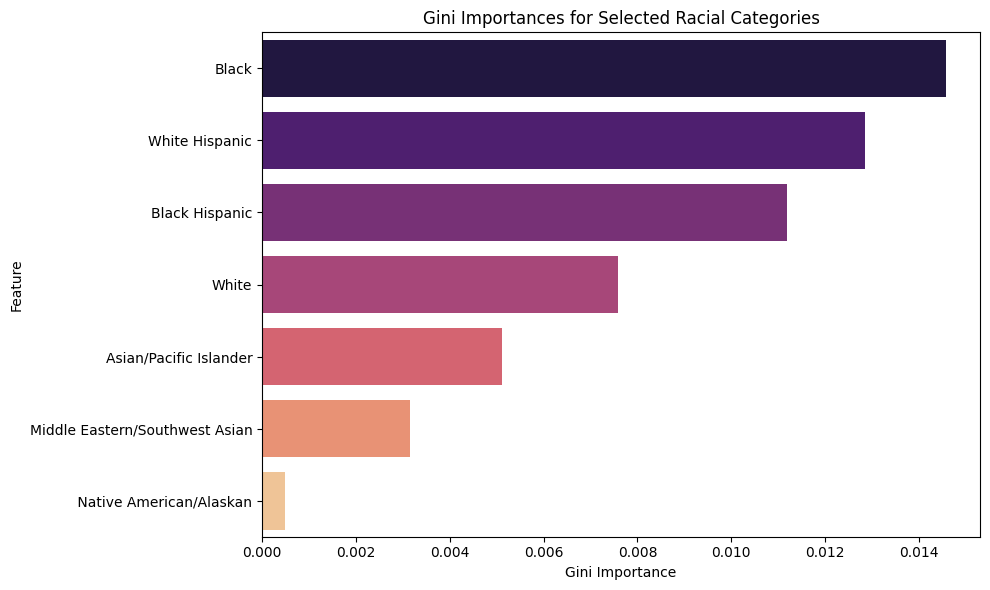

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(y=filtered_df['Feature'],x=filtered_df['Gini Importance'], data=filtered_df, hue = "Feature", palette = "magma")
plt.xlabel('Gini Importance')
plt.title('Gini Importances for Selected Racial Categories')  # Puts the highest importance at the top
plt.tight_layout()
plt.show()

#Question 1 Conclusions

Looking at this graph, racial data does not seem to play as large of a role in whether or not a stop and frisk leads to arrest. The Gini importance is quite low, meaning that it's not as major a factor as other factors like the presence of a firearm. However, despite the lower statistical importance of race, there still are large disparities between Black New Yorkers and White, Asian, and Middle Eastern New Yorkers. The numbers are also different from the regression model, as Asian americans are towards the bottom instead of the top. Race, while not a major factor for arrest, leans towards Black New Yorkers more so than the other races.

###Question 2

# **Does whether a cop is in uniform or not have an effect on the rate of people stopped who actually have something illegal on them?**

The goal in analyzing this question is to explore the effectiveness of an officer being less conspicuous, and not wearing uniforms so potential offendors are not privy to the fact that there is a cop nearby.

In [ ]:
stf["OFFICER_IN_UNIFORM_FLAG"].value_counts()

,count
OFFICER_IN_UNIFORM_FLAG,
Y,16676
N,295


While there are enough cases of officers not in uniform for us to make a claim, there a many more cases of officers in uniform, so to analyze our question we will not simply be able to just count how many stops were made where contraband was found for each situation. In order to make a fair comparison, we must take a few random samples of 295 cases from situations of officers in uniform to ensure fair comparison. We will also create a new dataframe of only officers not in uniform.

In [ ]:
sample1 = stf_dropped_col[stf_dropped_col["OFFICER_IN_UNIFORM_FLAG"] == "Y"].sample(n=295, random_state=1)
sample2 = stf_dropped_col[stf_dropped_col["OFFICER_IN_UNIFORM_FLAG"] == "Y"].sample(n=295, random_state=2)
sample3 = stf_dropped_col[stf_dropped_col["OFFICER_IN_UNIFORM_FLAG"] == "Y"].sample(n=295, random_state=3)
not_uniform = stf_dropped_col[stf_dropped_col["OFFICER_IN_UNIFORM_FLAG"] == "N"]

Here we have taken 3 random samples of 295 cases each where the officer was in uniform, which we can now compare in scale with the 295 cases where the officers were not in uniform. Lets create 3 barcharts, comparing the samples we created of officers in uniform with the officers not in uniform.

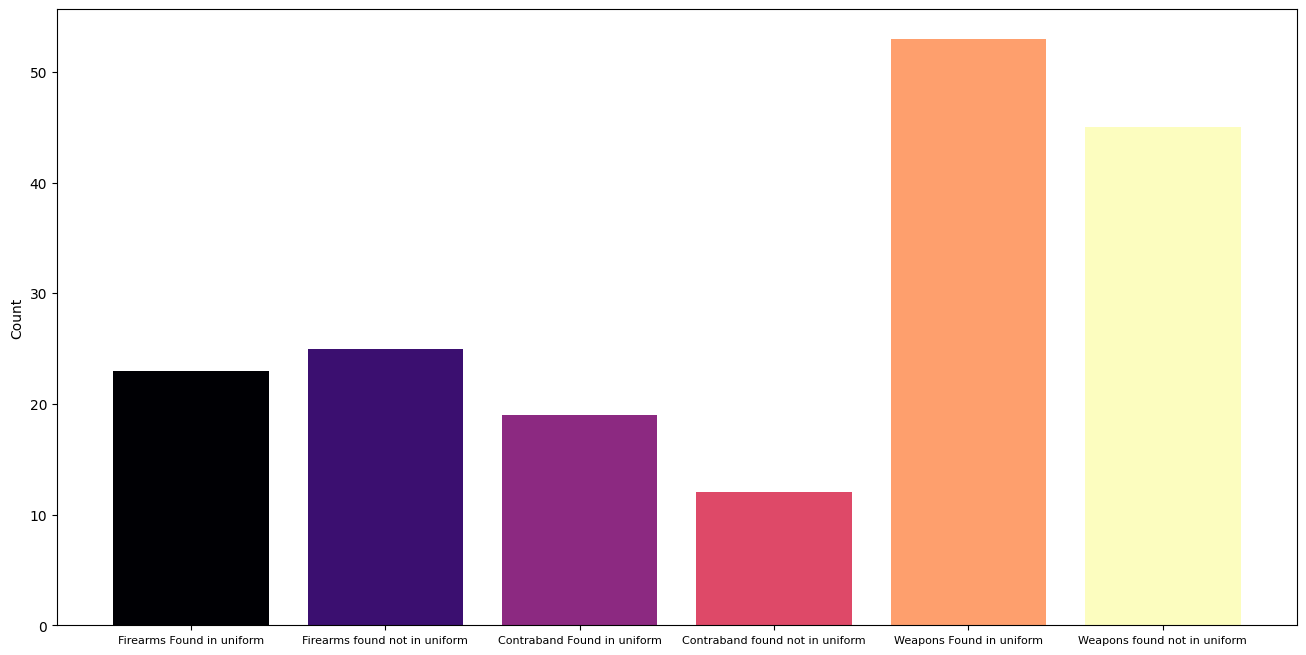

In [ ]:
u3_count = (sample2["FIREARM_FLAG"] == "Y").sum()
u4_count = (sample2["OTHER_CONTRABAND_FLAG"] == "Y").sum()
u5_count = (sample2["WEAPON_FOUND_FLAG"] == "Y").sum()
plt.figure(figsize=(16, 8))
plt.bar(["Firearms Found in uniform", "Firearms found not in uniform", "Contraband Found in uniform", "Contraband found not in uniform","Weapons Found in uniform", "Weapons found not in uniform"],[u3_count, n_count, u4_count, n1_count, u5_count, n2_count],color= plt.cm.magma(np.linspace(0, 1, 6)))
plt.xticks(fontsize=8)
plt.ylabel("Count")
plt.show()


Lets do this 2 more times, as 3 bar charts should help us decide if a pattern we relationship we recognize is just an anomaly in one sample.

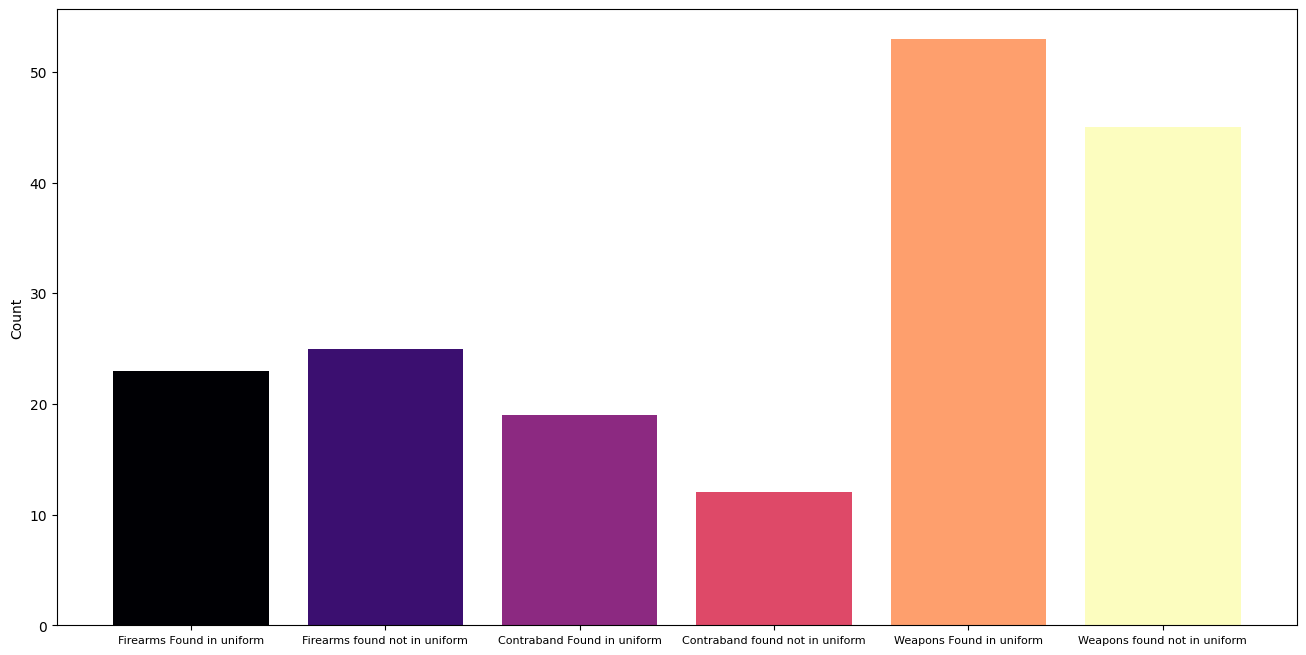

In [ ]:
u3_count = (sample2["FIREARM_FLAG"] == "Y").sum()
u4_count = (sample2["OTHER_CONTRABAND_FLAG"] == "Y").sum()
u5_count = (sample2["WEAPON_FOUND_FLAG"] == "Y").sum()
plt.figure(figsize=(16, 8))
plt.bar(["Firearms Found in uniform", "Firearms found not in uniform","Contraband Found in uniform", "Contraband found not in uniform", "Weapons Found in uniform", "Weapons found not in uniform"],[u3_count, n_count, u4_count, n1_count, u5_count, n2_count],color=plt.cm.magma(np.linspace(0, 1, 6)))
plt.xticks(fontsize=8)
plt.ylabel("Count")
plt.show()


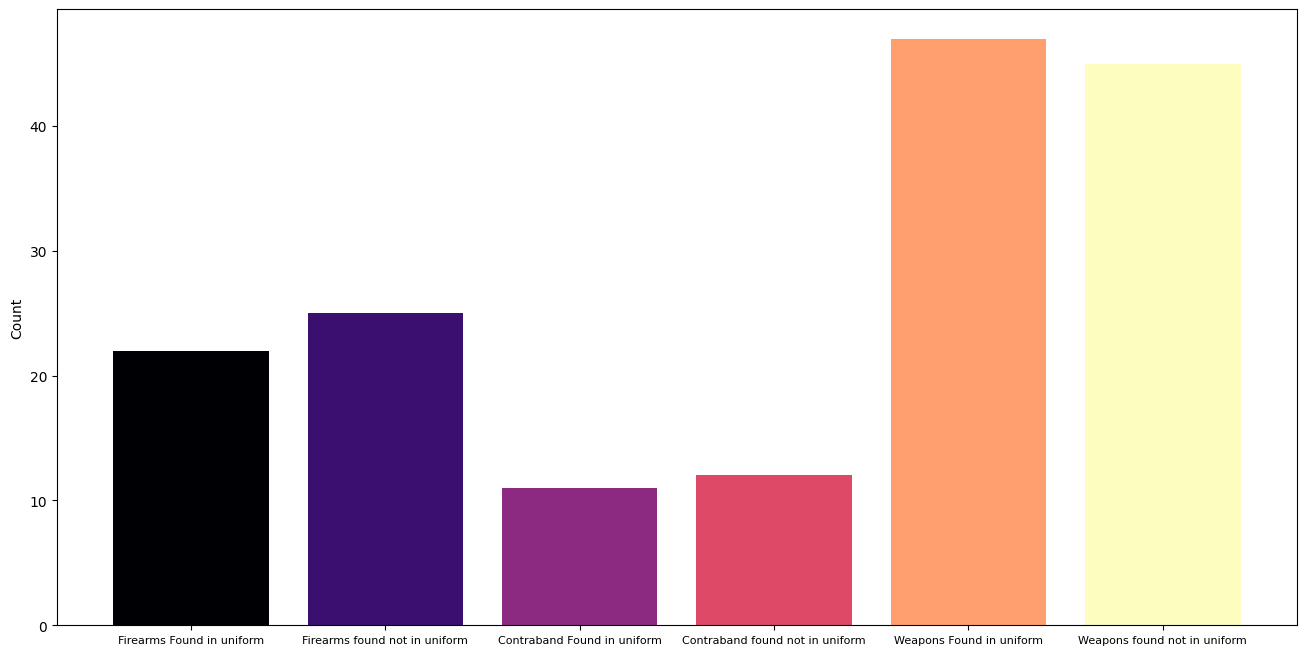

In [ ]:
u6_count = (sample3["FIREARM_FLAG"] == "Y").sum()
u7_count = (sample3["OTHER_CONTRABAND_FLAG"] == "Y").sum()
u8_count = (sample3["WEAPON_FOUND_FLAG"] == "Y").sum()
plt.figure(figsize=(16, 8))
plt.bar(["Firearms Found in uniform", "Firearms found not in uniform","Contraband Found in uniform", "Contraband found not in uniform","Weapons Found in uniform", "Weapons found not in uniform"],[u6_count, n_count, u7_count, n1_count, u8_count, n2_count],color=plt.cm.magma(np.linspace(0, 1, 6)))
plt.xticks(fontsize=8)
plt.ylabel("Count")
plt.show()

We see that 2/3 of the time, more firearms are found by officers not in uniform, with the first sample seeming to be an outlier. We see that 2/3 of the time, more contraband is found by officers in uniform, but all three occassions are quite close. It also seems that 3/3 times, more weapons are found by officers in uniform. There are no consistent and drastic differences noticeable in the barcharts, and it is difficult to make a concrete claim about whether an officer being in uniform increases their effectiveness in finding a certain type of illegal item.

Lets pivot what we are focusing on, and take a look at the proportions of what officers in and out of uniform are finding. Instead of researching their effectiveness in finding a certain illegal item, lets look at how much of 1 illegal item they find in proportion to their other findings, to see if whether they are in uniform makes them more likely to find one item then another.

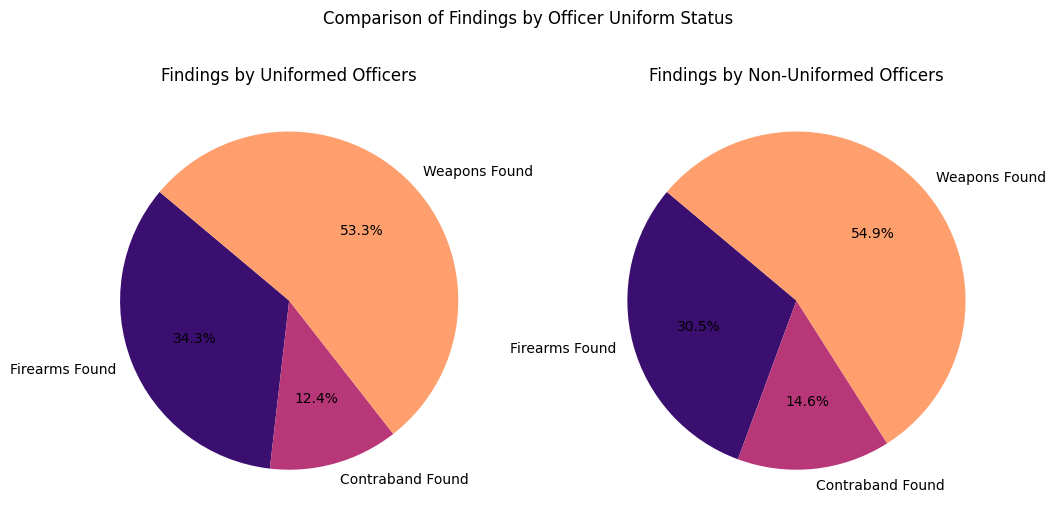

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Uniform Pie Chart
axes[0].pie([u_count, u1_count, u2_count],labels=['Firearms Found', 'Contraband Found', 'Weapons Found'],autopct='%1.1f%%',startangle=140,colors=plt.cm.magma(np.linspace(0.2, 0.8, 3)))
axes[0].set_title('Findings by Uniformed Officers')
# Not in Uniform Pie Chart
axes[1].pie([n_count, n1_count, n2_count],labels=['Firearms Found', 'Contraband Found', 'Weapons Found'],autopct='%1.1f%%',startangle=140,colors=plt.cm.magma(np.linspace(0.2, 0.8, 3)))
axes[1].set_title('Findings by Non-Uniformed Officers')
plt.suptitle('Comparison of Findings by Officer Uniform Status')
plt.show()

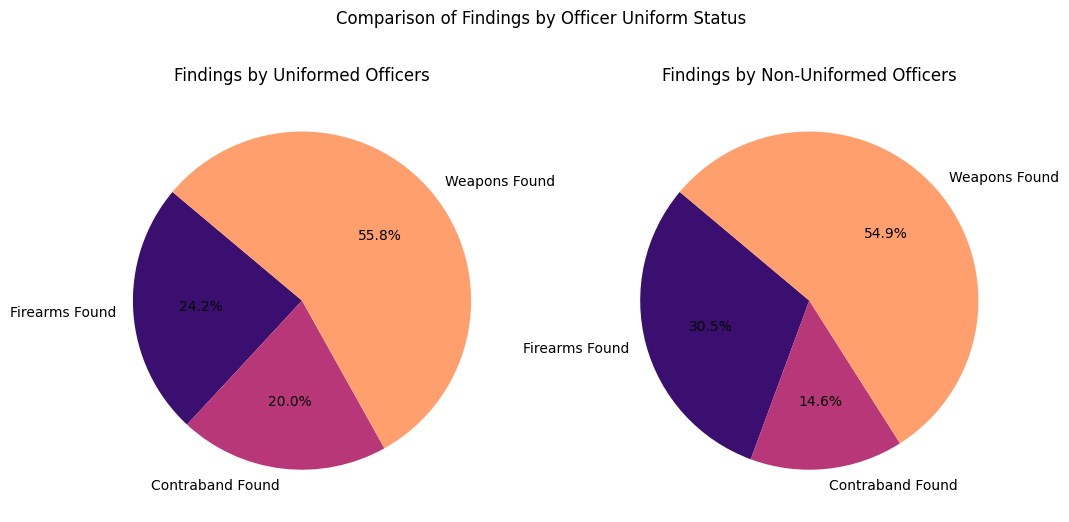

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Uniform Pie Chart
axes[0].pie([u3_count, u4_count, u5_count],labels=['Firearms Found', 'Contraband Found', 'Weapons Found'],autopct='%1.1f%%',startangle=140,colors=plt.cm.magma(np.linspace(0.2, 0.8, 3)))
axes[0].set_title('Findings by Uniformed Officers')
# Not in Uniform Pie Chart
axes[1].pie([n_count, n1_count, n2_count],labels=['Firearms Found', 'Contraband Found', 'Weapons Found'],autopct='%1.1f%%',startangle=140,colors=plt.cm.magma(np.linspace(0.2, 0.8, 3)))
axes[1].set_title('Findings by Non-Uniformed Officers')
plt.suptitle('Comparison of Findings by Officer Uniform Status')
plt.show()

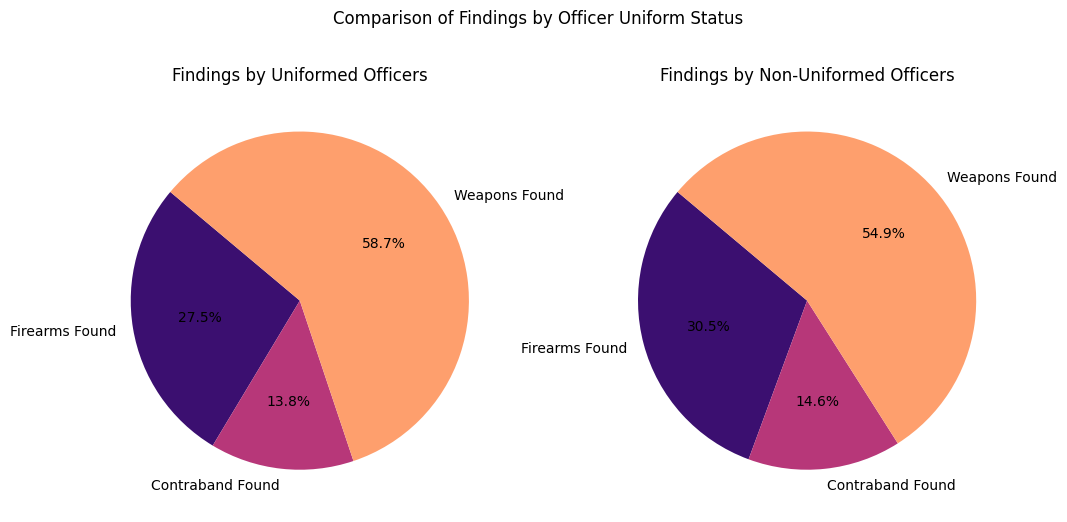

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Uniform Pie Chart
axes[0].pie([u6_count, u7_count, u8_count],labels=['Firearms Found', 'Contraband Found', 'Weapons Found'],autopct='%1.1f%%',startangle=140,colors=plt.cm.magma(np.linspace(0.2, 0.8, 3)))
axes[0].set_title('Findings by Uniformed Officers')
# Not in Uniform Pie Chart
axes[1].pie([n_count, n1_count, n2_count], labels=['Firearms Found', 'Contraband Found', 'Weapons Found'],autopct='%1.1f%%',startangle=140,colors=plt.cm.magma(np.linspace(0.2, 0.8, 3)))
axes[1].set_title('Findings by Non-Uniformed Officers')
plt.suptitle('Comparison of Findings by Officer Uniform Status')
plt.show()

Again, we are unable to make a concrete claim as to what an officer might tend to find more often then the other items based on whether they are wearing a uniform. There are no discernable patterns, and it seems the uniform, or lack therof, does not make a strong difference.

#Conclusion

All evidence seems to point in the direction that whether an officer is in uniform or not has no strong influince on their efficency in finding contraband, firearms, and weapons, as well as what they find more often then others. We are not able to make a claim, and it seems that we should not reccomend any sort of uniform policy to the NYPD, as it seems to not matter at all.

###Question 3
####How does what gender you are have an effect on the duration of time you are observed for before being searched, and how does it have an effect on long you were stopped for?

When looking at this question, the main thing we want to know is how these frisks stops differ when the person being stopped is a Male or Female. We want to see if there is a possibility that women and men are observed for a similar amount of time before they are stopped.

The first thing we want to look at is how many men and women are present in this dataset, as this will give us some well needed context.

<ipython-input-295-5e3bb80abf20>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(stf_dropped_col,x="SUSPECT_SEX", palette = "magma")#In order to determine the amount of people associated with a specific gender, I used a countplot which only takes in one variable and leaves the other axis to take the count of the variable you used.


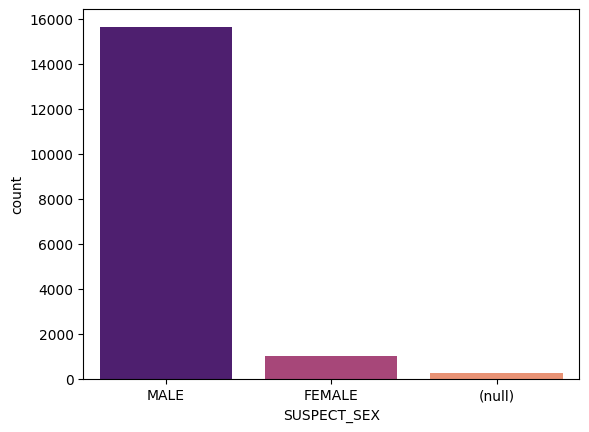

In [ ]:
sns.countplot(stf_dropped_col,x="SUSPECT_SEX", palette = "magma")#In order to determine the amount of people associated with a specific gender, I used a countplot which only takes in one variable and leaves the other axis to take the count of the variable you used.
plt.show()#It's important to note that this dataset included a few "null" data sets in the "SUSPECT_SEX" column that are unrealted to the idea of null data, so they were not removed when we cleaned the dataset.

#### Results
As shown above, we were able to determine that this dataset mainly consists of Males, as just over 15,000 stops made were deemed to be Males. On the other hand females make up a small portion of this dataset, with just around 1,000 stops being female. This may make our latter results seem a bit out of proportions, but its still good to know for our purposes that the majority of stops made are male.

### Observed Duration Minutes
The next thing we want to look at is how long each gender was observed for before a stop was initiated. We want to see if there is a a big difference between the observed duration minutes between males and females, as this could show us some interesting data analytics. The best way to visually display this is with the use of a barplot.

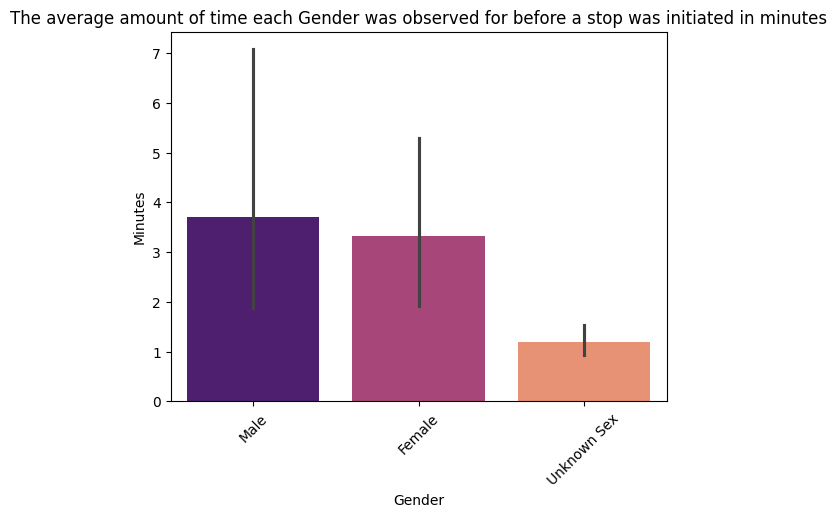

In [ ]:
labels = ["Male", "Female", "Unknown Sex"] #In order to clean this visualization, labels are the best way to name your variables that you plan to use to whatever you desire. In this case Male, Female and Unknown Sex.


sns.barplot(stf_dropped_col, x ="SUSPECT_SEX", y = "OBSERVED_DURATION_MINUTES", hue = "SUSPECT_SEX", palette = "magma") #In order to answer this question, a barplot would be the best option as this take data from 2 variables which is exactly what we need when answering this question.
plt.xticks(ticks= range(len(labels)), labels = labels, rotation = 45)
plt.xlabel("Gender")
plt.ylabel("Minutes")
plt.title("The average amount of time each Gender was observed for before a stop was initiated in minutes")


plt.show()

### Results of Observed Duration Minutes
As seen above, we were able to determine with the barplot that Males are often observed for a longer duration when compared to Females. But it's important to note as determined ealier that this dataset includes way more Males when compared to Females, so this may have an effect on the average observed minutes. But for our purposes this tells us exactly that Males are observed for longer than Females.

### Stop Duration Minutes
The next thing we want to look at is how long on average were stops when comparing Males to Females. Like before we want to see if there is a big difference when comparing this data, in particular when looking at Males and Females. Like before, a barplot is the best way to display this as we get a clear visual representation to what we need.

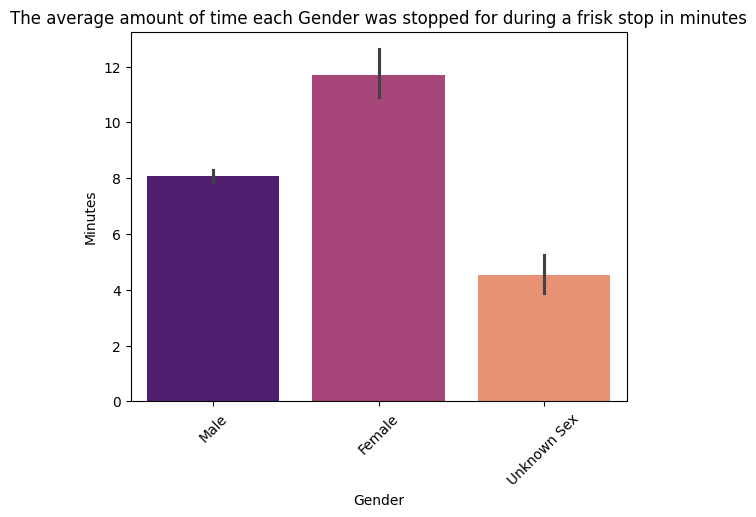

In [ ]:
labels = ["Male", "Female", "Unknown Sex"]#Just as in the previous question,labels are the best way to name your variables that you plan to use to whatever you desire. In this case Male, Female and Unknown Sex work the best as well.


sns.barplot(stf_dropped_col, x ="SUSPECT_SEX", y = "STOP_DURATION_MINUTES", hue = "SUSPECT_SEX", palette = "magma") #In order to answer this question as previously used, a barplot would be the best option as this take data from 2 variables which is exactly what we need.
plt.xticks(ticks= range(len(labels)), labels = labels, rotation = 45)
plt.xlabel("Gender")
plt.ylabel("Minutes")
plt.title("The average amount of time each Gender was stopped for during a frisk stop in minutes")

plt.show()

###Results of Stop Duration Minutes
As seen above, we actually have results that we're not what we expected. When it comes to the gender with the highest average stop duration length, it's actually the females with the higher stop duration, with females averaging around 11 minutes while males are around averaging around 8 minutes. This is interesting because it's the complete opposite of the observed duration minutes, with the opposite gender having the greater average.

###Overall Conclusion of Question 3
When taking a look at both of these data points, it's clear we are seeing some sort of pattern. While males are typically observed for a longer time before they are stopped when compared to females, it's the females who are stopped for longer during the actual stop. As mentioned earlier it's important to note that in this particular dataset, there a lot more males than females, so the average could potentially be misleading. But overall, it's made clear that their is an effect on the stopped duration minutes based on gender as Women are stopped for a longer amount of time, and their is also an effect on the stopped duration minutes based on gender as Men are observed for a longer amount of time.

#Question 4

####What variables can be used to predict the duration of a stop?

This question is asked in order to determine whether police efforts are being allocated in an efficient amount of time for legitimate reasons. We hypothesize that based off the information given in the dataset we will be able to determine exactly impacts stop duration. We will specifically obsersve and predict that observed minutes will have a high impact on stop duration minutes. We will also hold special focus on how race might affect the duration of a stop as the New York police have gone through scrutiny on whether racial factors play a major role on who they impact. We saw earlier that race doesn't play a huge role on whether a stop leads to an arrest, however, we must analyze whether it impacts the duration of a stop as well. We will use a random foest regression model in order to help in our prediction.

In [ ]:
# Our X variable will be a list of columns from which we will derive information from.
# We remove columns that seem unnecessary in predicting stop duration.
# This will help to predict the stop duration, which is our y variable.
X = stf_dropped_col[['OBSERVED_DURATION_MINUTES',
        'OTHER_PERSON_STOPPED_FLAG', 'SUSPECT_ARRESTED_FLAG',
       'FRISKED_FLAG', 'SEARCHED_FLAG','SUSPECT_SEX',
      'WEAPON_FOUND_FLAG', 'CONSENT_GIVEN_FLG',
       'PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG','OTHER_WEAPON_FLAG',
      'SUSPECT_RACE_DESCRIPTION','OFFICER_IN_UNIFORM_FLAG',]]

# Here we are "one-hot encoding". This is where we convert the categorical columns to numbers.
X = pd.get_dummies(X, drop_first=True).astype("float32")

y = stf_dropped_col["STOP_DURATION_MINUTES"]

# Making sure we are able to locate feature names later
feature_names = X.columns.tolist()

# Below we perform a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# We lastly fit the model
model = RandomForestRegressor().fit(X_train, y_train)

# Make predictions
predictions = model.predict(X)

In [ ]:
# Get the feature importances
# Here we see how much each feature influences the stop duration
importances = model.feature_importances_

# Create a DataFrame to store feature names
feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Gini Importance': importances
})
# Sort the DataFrame by importance with the most important going first
feature_imp_df = feature_imp_df.sort_values('Gini Importance', ascending=False)

# Print the sorted feature importance
print(feature_imp_df)

                                              Feature  Gini Importance
0                           OBSERVED_DURATION_MINUTES         0.276336
9                                 CONSENT_GIVEN_FLG_Y         0.082254
4                                     SEARCHED_FLAG_Y         0.073633
8                                 CONSENT_GIVEN_FLG_N         0.065463
1                               SUSPECT_ARRESTED_FLAG         0.062200
2                         OTHER_PERSON_STOPPED_FLAG_Y         0.057932
10           PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG_Y         0.050703
14                     SUSPECT_RACE_DESCRIPTION_BLACK         0.048224
18            SUSPECT_RACE_DESCRIPTION_WHITE HISPANIC         0.046971
3                                      FRISKED_FLAG_Y         0.046288
7                                 WEAPON_FOUND_FLAG_Y         0.039485
5                                  SUSPECT_SEX_FEMALE         0.028392
15            SUSPECT_RACE_DESCRIPTION_BLACK HISPANIC         0.023263
17    

##Observation
We can see that the variable OBSERVED_DURATION_MINUTES has the largest influence on stop duration minutes. After this we see that a suspect getting searched, giving consent and being arrested also largely impact the duration of a stop. We see that another person also being stopped and the use of physical force both also have a large influences. The suspect's race and whether or not they were frisked have later impact. The first seven variables seem to be reasonable determinants for the duration of a stop. While race does not seem to have a large impact on the duaration of a stop, it is interesting to note that it's impact is greater than if the suspect were to be frisked. Let's look at the top ten variables.

<ipython-input-300-27dfa61ca040>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, y='Feature', x='Importance', palette='magma')


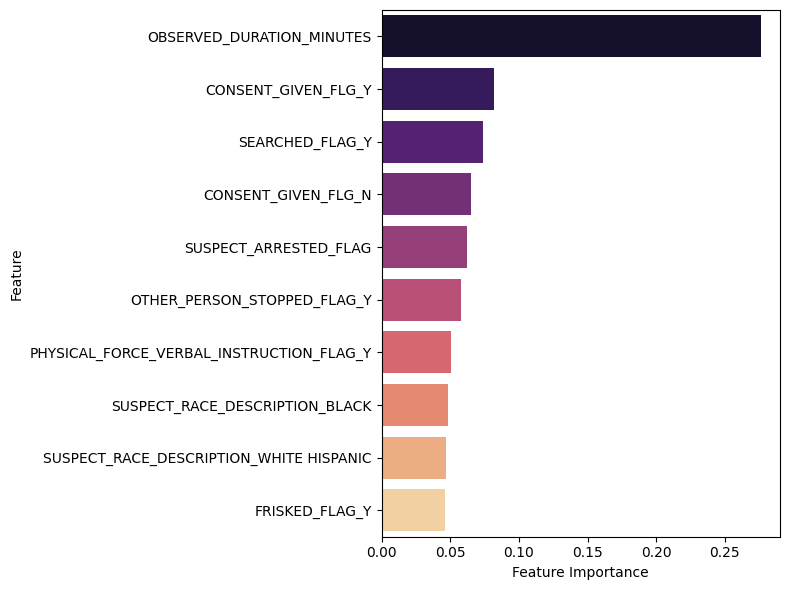

In [ ]:
# # We will now visualize the top ten variables affecting stop duration
# Create a Series with feature importances
forest_importances = pd.Series(model.feature_importances_, index=feature_names)

# Sort descending and isolate the top 10
top_10_importances = forest_importances.sort_values(ascending=False).head(10)

# Sort top 10 in ascending order for a horizontal bar chart
top_10_importances = top_10_importances.sort_values(ascending=False)

# Convert to DataFrame for Seaborn
importance_df = top_10_importances.reset_index()
importance_df.columns = ['Feature', 'Importance']

# Plot with our seaborn library
plt.figure(figsize=(8, 6))
sns.barplot(data=importance_df, y='Feature', x='Importance', palette='magma')

# Set the labels and plot the visualization
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()

In [ ]:
# Here we will evaluate the accuracy of the model
mse = mean_squared_error(y, predictions)
r2 = r2_score(y,predictions)

# Print evaluation
# The mean squared error the average squared difference between predicted values of the model and the actual values.
# A low MSE is good, it shows how far off the predicitions are from the actual values
# R-squared should be closer to 1
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 146.34722422948664
R-squared: 0.18485872550790483


##Evaluation of model
The evaluation shows that our model is very poor. This could be due to the columns we had previously taken out. We sill try to make a model using all of the columns available to us, only taking out the columnn of our y variable and a few categorical columns that could reduce accuracy such as MONTH2 and DAY2.

In [ ]:
X = stf_dropped_col[['STOP_WAS_INITIATED', 'OBSERVED_DURATION_MINUTES',
         'SUSPECTED_CRIME_DESCRIPTION',
        'OFFICER_EXPLAINED_STOP_FLAG', 'OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION',
        'OTHER_PERSON_STOPPED_FLAG', 'SUSPECT_ARRESTED_FLAG',
        'SUSPECT_ARREST_OFFENSE', 'SUMMONS_ISSUED_FLAG',
        'OFFICER_IN_UNIFORM_FLAG', 'FRISKED_FLAG', 'SEARCHED_FLAG',
        'ASK_FOR_CONSENT_FLG', 'CONSENT_GIVEN_FLG', 'OTHER_CONTRABAND_FLAG',
        'FIREARM_FLAG', 'OTHER_WEAPON_FLAG', 'WEAPON_FOUND_FLAG',
        'PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG', 'SUSPECT_REPORTED_AGE',
        'SUSPECT_SEX', 'SUSPECT_RACE_DESCRIPTION', 'SUSPECT_HEIGHT',
        'SUSPECT_WEIGHT', 'SUSPECT_EYE_COLOR', 'SUSPECT_HAIR_COLOR',
        'STOP_LOCATION_BORO_NAME']]


X = pd.get_dummies(X, drop_first=True)

y = stf_dropped_col["STOP_DURATION_MINUTES"]

feature_names = X.columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = RandomForestRegressor().fit(X_train, y_train)

predictions = model.predict(X)

mse = mean_squared_error(y, predictions)
r2 = r2_score(y,predictions)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 58.669885532897275
R-squared: 0.6732138547937324


##Evaluation of Second Model
Here we can already see an improvment to our model though it is still a bit poor in accuracy.

In [ ]:
# We will calculate how much each feature influences the stop duration, once again to see if there are any stark differences
importances = model.feature_importances_

# Create a DataFrame to store feature names
feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Gini Importance': importances
})
# Sort the DataFrame by importance with the most important going first
feature_imp_df = feature_imp_df.sort_values('Gini Importance', ascending=False)

# Print the sorted feature importance
print(feature_imp_df)

                                               Feature  Gini Importance
690                            SUSPECT_REPORTED_AGE_17         0.092205
0                            OBSERVED_DURATION_MINUTES         0.051675
7                      SUSPECTED_CRIME_DESCRIPTION_CPW         0.033097
755                        SUSPECT_REPORTED_AGE_(null)         0.028880
668                                    SEARCHED_FLAG_Y         0.026303
..                                                 ...              ...
622  OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION_WAS AWA...         0.000000
927                                 SUSPECT_WEIGHT_340         0.000000
620  OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION_WAS AN ...         0.000000
923                                 SUSPECT_WEIGHT_310         0.000000
924                                 SUSPECT_WEIGHT_315         0.000000

[964 rows x 2 columns]


##Observation
We see can clearly that there are some differences in our predictions. We see that a suspect's age, when at 17, has the largest influence on stop duration. Suspected crime descripion also plays a much more important role in determining the duration of a stop.

<ipython-input-304-8f994e1eb391>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, y='Feature', x='Importance', palette='magma')


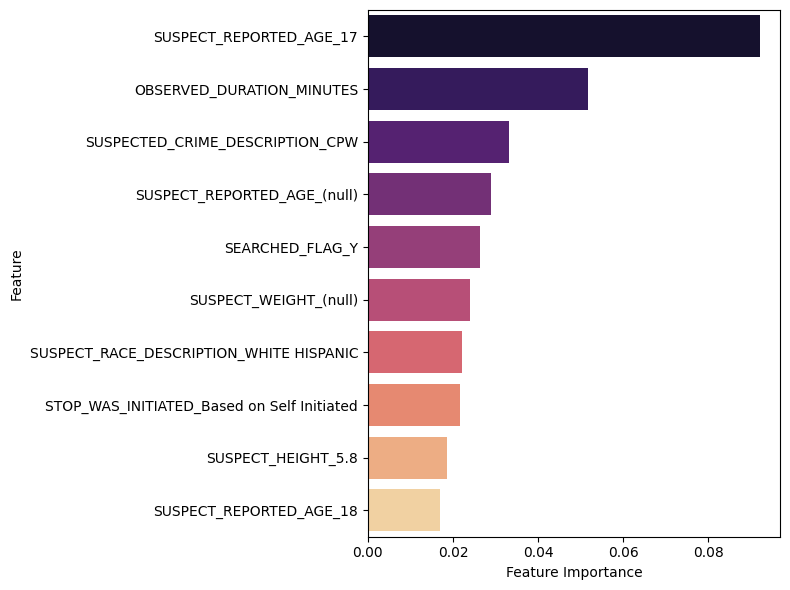

In [ ]:
# # We will now again visualize the top ten variables affecting stop duration
# Create a Series with feature importances
forest_importances = pd.Series(model.feature_importances_, index=feature_names)

# Sort descending and isolate the top 10
top_10_importances = forest_importances.sort_values(ascending=False).head(10)

# Sort top 10 in ascending order for a horizontal bar chart
top_10_importances = top_10_importances.sort_values(ascending=False)

# Convert to DataFrame for Seaborn
importance_df = top_10_importances.reset_index()
importance_df.columns = ['Feature', 'Importance']

# Plot with our seaborn library
plt.figure(figsize=(8, 6))
sns.barplot(data=importance_df, y='Feature', x='Importance', palette='magma')

# Set the labels and plot the visualization
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()

From the visualization we see the added importance of a suspect's weight and age. We also see that the location of the stop, the desrcription of crime and how the stop was initiated can play a role on stop duration. We still see a high importance of observed minutes on stop duration.

##Findings
The results of our findings show us how predicitng stop duration is a complicated and tricky task. We initially created a model based only on columns of information we percieved to be important. However this model was evaluated and proven to be quite poor in accuracy levels. We then tried adding more columns to a new model. We excluded columns that could possibly interfere in the prediciton accuracy once again. The addition of our X variables seemed to haven improved our model's performance. We then saw how other factors play a role in the duration of a stop. Factors we had not previously paid much attention to were now included in our data analysis. For example, a suspect's age was shown to have played a major role. This was especially true for younger suspects, notably those who were 17 years old. However, in both models, one variable that was proved to have consistently high impact on the duration of a stop was the duration in which a suspect was observed before a stop.

# Conclusion
The observation minutes of suspect before a stop is something that reasonably impacts the duration for which a suspect is stopped by police. In this we can reassure the public that their local authorities do in fact take their time in analyzing a situation before taking action. However, we must question why the New York City police seems to especially focus on a suspect's race, age, weight and height when stopping someone. Why is it that these factor contribute to the duration of a stop? This is something to report to the public in order to ensure the scrutiny of such practice. Our second model showing that a 17 year old suspect's stop duration can be impacted by their age can be viewed as reasonable however since the suspect is minor and the authoritites likely need to take thier time in locating the guardian of the suspect. Further data and research is need to come to a complete conclusion. There must be other factors or another way to improve the accuracy of the model predicting stop duration. That is one large limitation of this research.

###Project Conclusion

As a small community non-profit working toward fairness and transparency in public safety, we set out to answer four key questions about the NYPDs stop and frisk practices. After digging into the data, here is what we found:

First, Black and Hispanic New Yorkers are being stopped at rates that do not reflect the city’s population. This confirms concerns that these communities are being unfairly targeted. It is something many people in these neighborhoods have said for years, and the data backs that up.

Second, whether officers were in uniform or not did not seem to make much difference. Both groups had very similar success rates when it came to actually finding firearms, weapons, or other contraband. Both these groups also seem to find different kinds of illegal items in very similar proportions. This raises questions about how effective these undercover stops really are.

Third, when we looked at how long people were observed and how long the stops lasted, we noticed a pattern based on gender. Men tended to be watched for longer before the stop actually happened, but once the stop started, women were the ones who were stopped for a longer period of time. Its worth mentioning that the dataset had far more stops involving men than women, so the averages might not tell the full story. Still, the data suggests there are differences in how stop and frisk plays out based on gender—something worth looking into further.


Finally, we looked at how different personal factors—like race, age, weight, and height—might influence how long someone is held during a stop. While it was somewhat reassuring to see that officers do appear to spend time observing before taking action, we were concerned by the role these personal characteristics seem to play in the length of a stop. For example, our model showed that younger suspects, especially minors like 17-year-olds, often experience longer stops—possibly because officers need to contact a parent or guardian. Still, this raises important questions about why certain factors seem to influence how long people are held. More data and research would be needed to fully understand these patterns, and improving how we predict or explain stop duration remains an important challenge for future work.

In the end, our hope is that this work helps bring attention to the real impacts of stop and frisk in New York City. While data can’t capture every experience, it can help us ask better questions and push for practices that treat all communities with fairness and respect. We look forward to continuing this work alongside the people we serve.